In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "MBA.csv"
df = pd.read_csv(file_path)

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


(None,
    application_id  gender  international   gpa       major      race   gmat  \
 0               1  Female          False  3.30    Business     Asian  620.0   
 1               2    Male          False  3.28  Humanities     Black  680.0   
 2               3  Female           True  3.30    Business       NaN  710.0   
 3               4    Male          False  3.47        STEM     Black  690.0   
 4               5    Male          False  3.35        STEM  Hispanic  590.0   
 
    work_exp          work_industry admission  
 0       3.0     Financial Services     Admit  
 1       5.0  Investment Management       NaN  
 2       5.0             Technology     Admit  
 3       6.0             Technology       NaN  
 4       5.0             Consulting       NaN  )

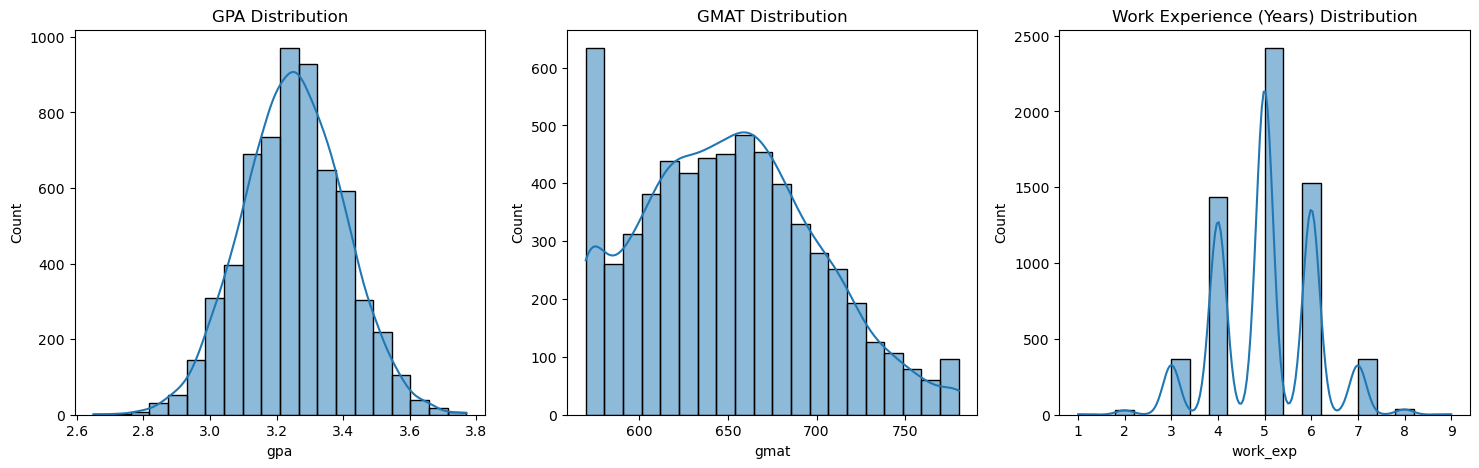

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['gpa'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("GPA Distribution")
sns.histplot(df['gmat'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("GMAT Distribution")
sns.histplot(df['work_exp'], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Work Experience (Years) Distribution")
plt.show()

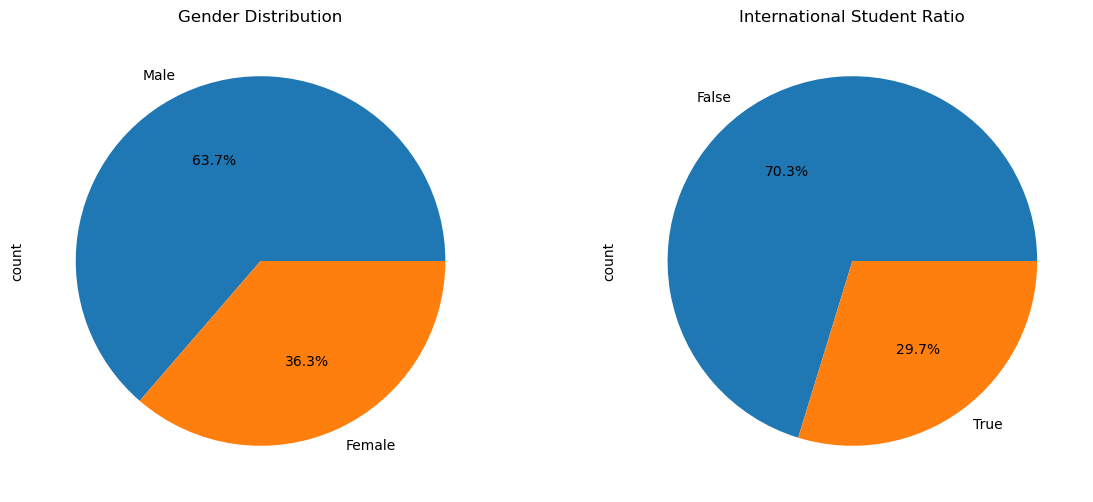

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title("Gender Distribution")
df['international'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title("International Student Ratio")
plt.show()

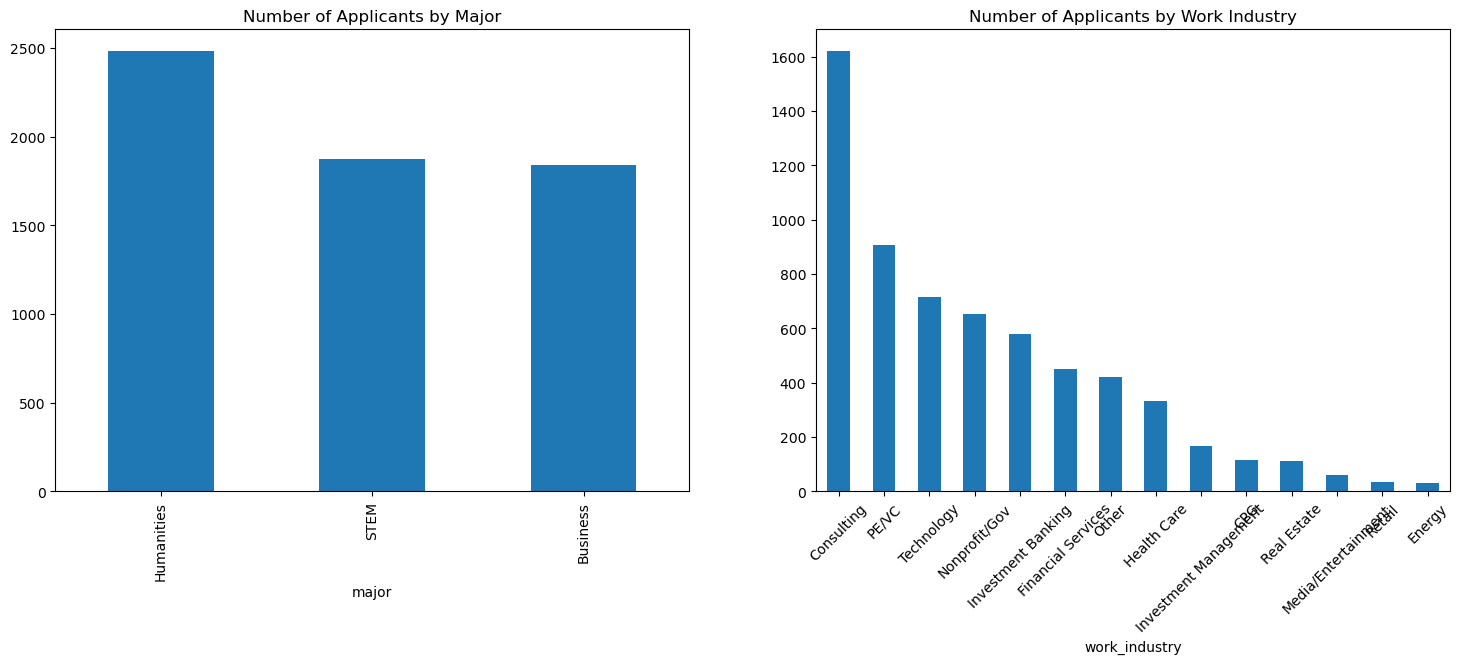

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
df['major'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("Number of Applicants by Major")
df['work_industry'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("Number of Applicants by Work Industry")
plt.xticks(rotation=45)
plt.show()

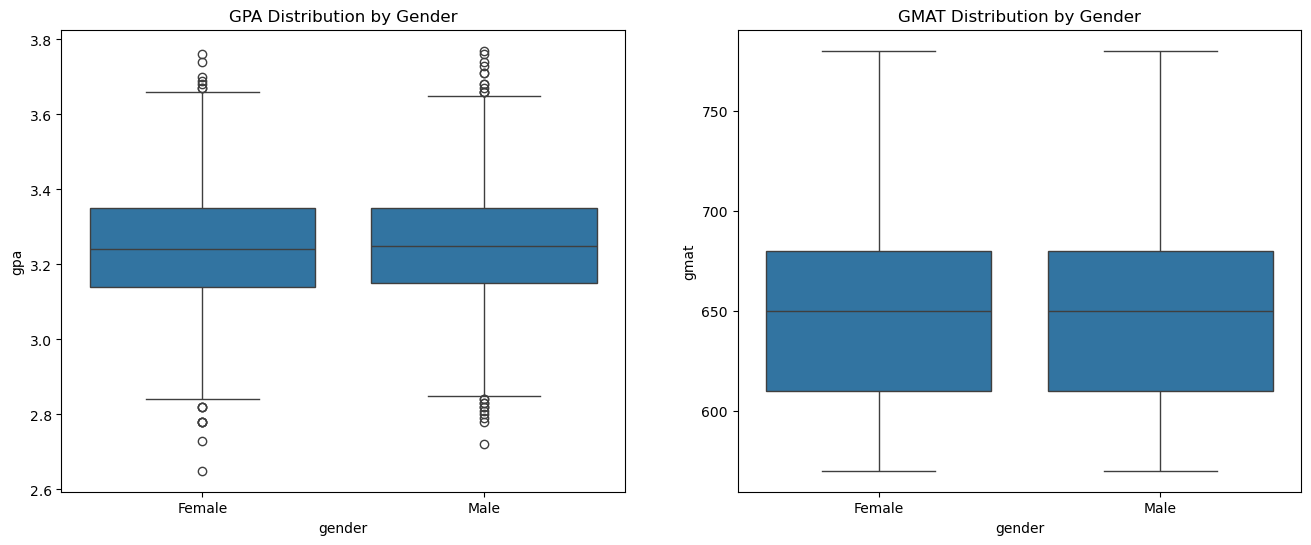

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x="gender", y="gpa", data=df, ax=axes[0])
axes[0].set_title("GPA Distribution by Gender")
sns.boxplot(x="gender", y="gmat", data=df, ax=axes[1])
axes[1].set_title("GMAT Distribution by Gender")
plt.show()

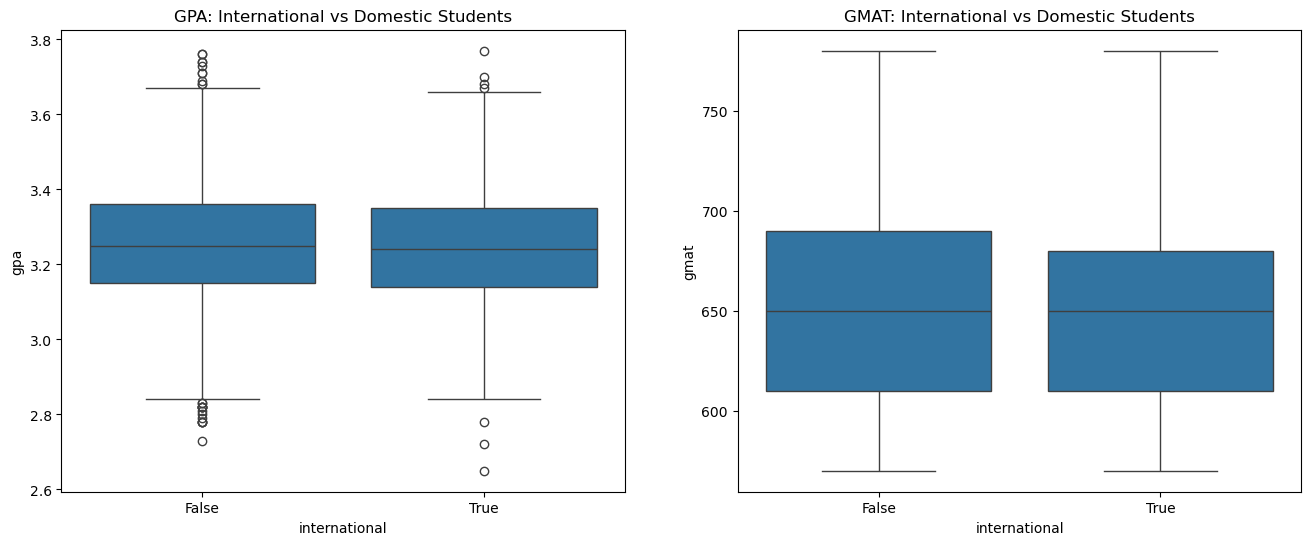

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x="international", y="gpa", data=df, ax=axes[0])
axes[0].set_title("GPA: International vs Domestic Students")
sns.boxplot(x="international", y="gmat", data=df, ax=axes[1])
axes[1].set_title("GMAT: International vs Domestic Students")
plt.show()

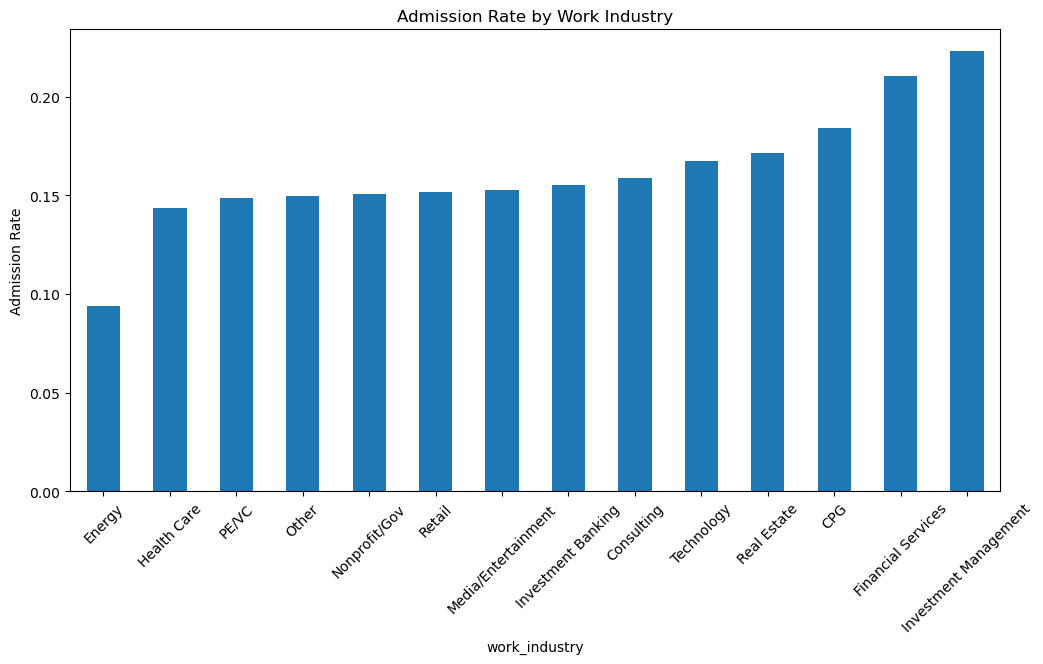

In [12]:
admission_rate = df.groupby("work_industry")["admission"].apply(lambda x: x.notnull().mean()).sort_values()
plt.figure(figsize=(12, 6))
admission_rate.plot(kind="bar")
plt.title("Admission Rate by Work Industry")
plt.ylabel("Admission Rate")
plt.xticks(rotation=45)
plt.show()

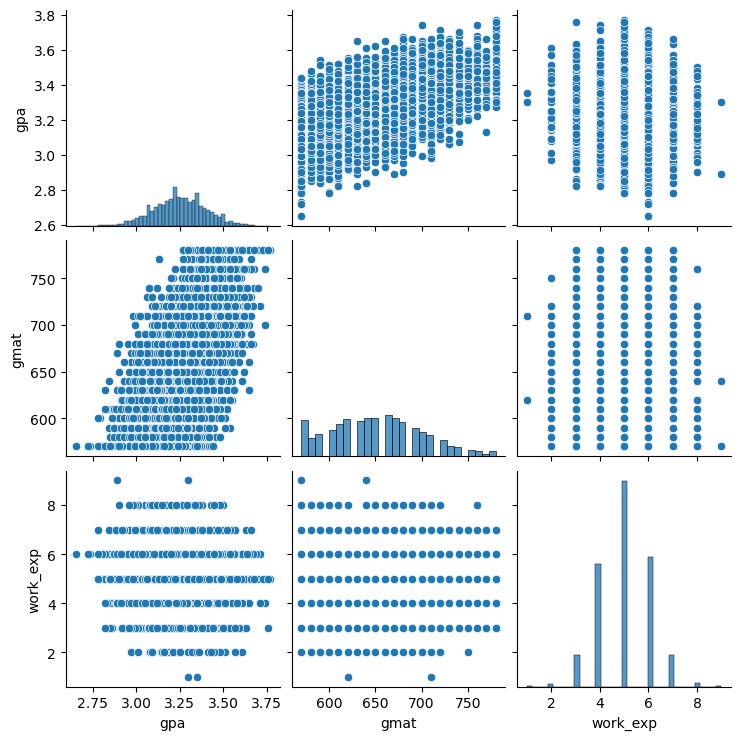

In [13]:
sns.pairplot(df[['gpa', 'gmat', 'work_exp']])
plt.show()

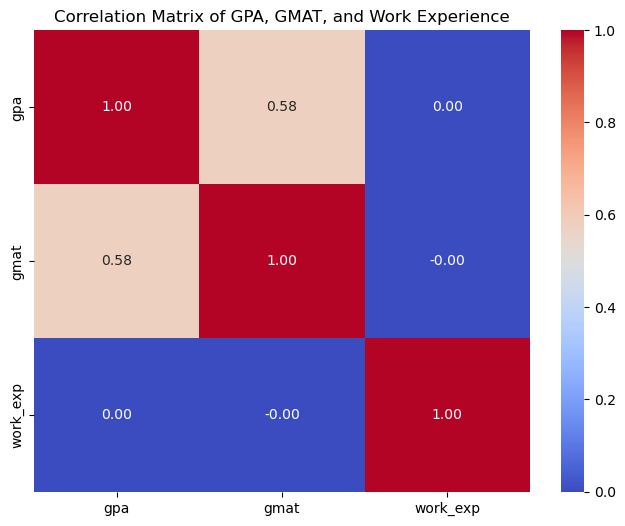

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['gpa', 'gmat', 'work_exp']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of GPA, GMAT, and Work Experience")
plt.show()

In [35]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:

file_path = "MBA.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load the dataset
df = pd.read_csv(file_path)

# Display info
print(df.info())  # Ensure data is correctly loaded
print(df.head())

# Drop rows with missing target variable
df = df.dropna(subset=['admission'])

# Convert target variable to binary (if applicable)
df['admission'] = df['admission'].apply(lambda x: 1 if x == "Admit" else 0)

# Identify categorical columns that exist
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

# One-hot encode categorical features
if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)

# Define features and target
X = df.drop(columns=['application_id', 'admission'], errors='ignore')
y = df['admission']

numerical_cols = ['gpa', 'gmat', 'work_exp']
existing_numerical_cols = [col for col in numerical_cols if col in X.columns]

if existing_numerical_cols:
    scaler = StandardScaler()
    X[existing_numerical_cols] = scaler.fit_transform(X[existing_numerical_cols].copy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
None
   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           Tr

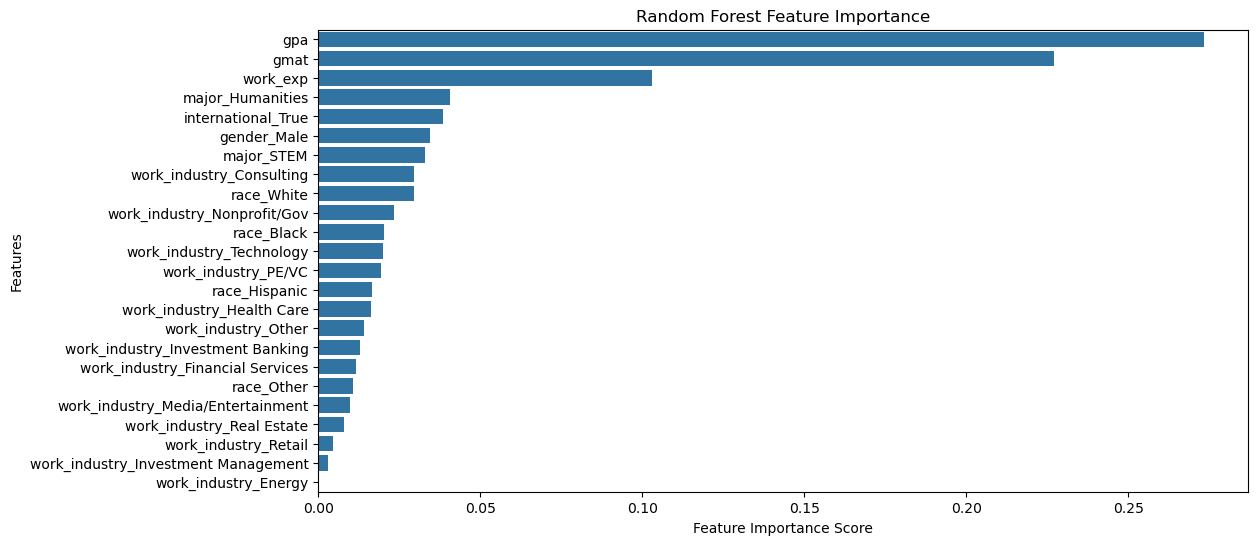

Random Forest Accuracy: 0.8850


In [37]:
if X_train.empty or X_test.empty:
    raise ValueError("Training or testing dataset is empty!")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Feature Importance Plot
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=rf_importance.values, y=rf_importance.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

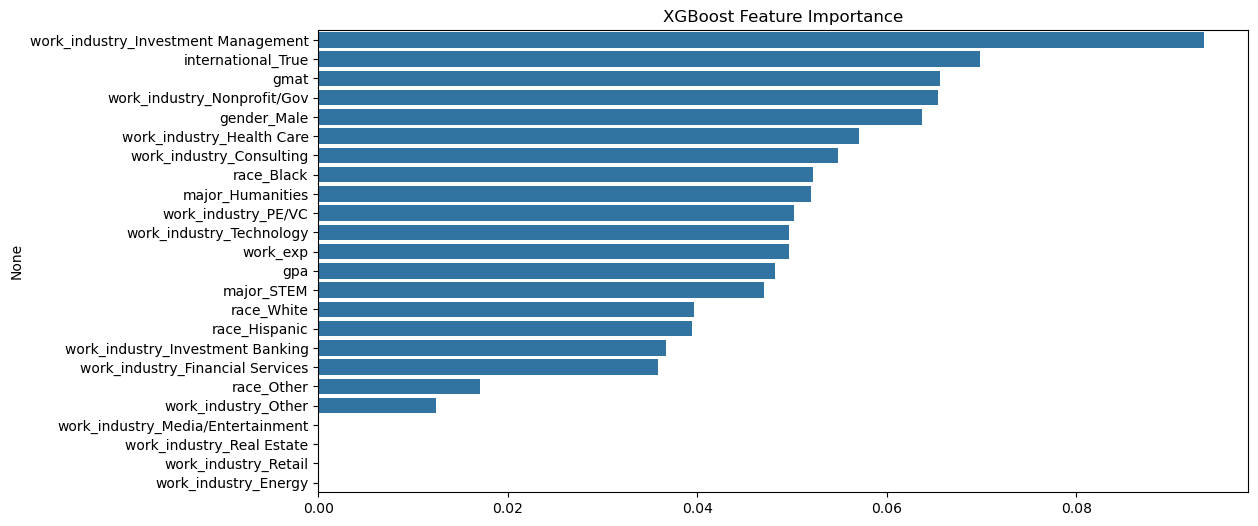

XGBoost Accuracy: 0.8400


In [38]:

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index)
plt.title("XGBoost Feature Importance")
plt.show()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


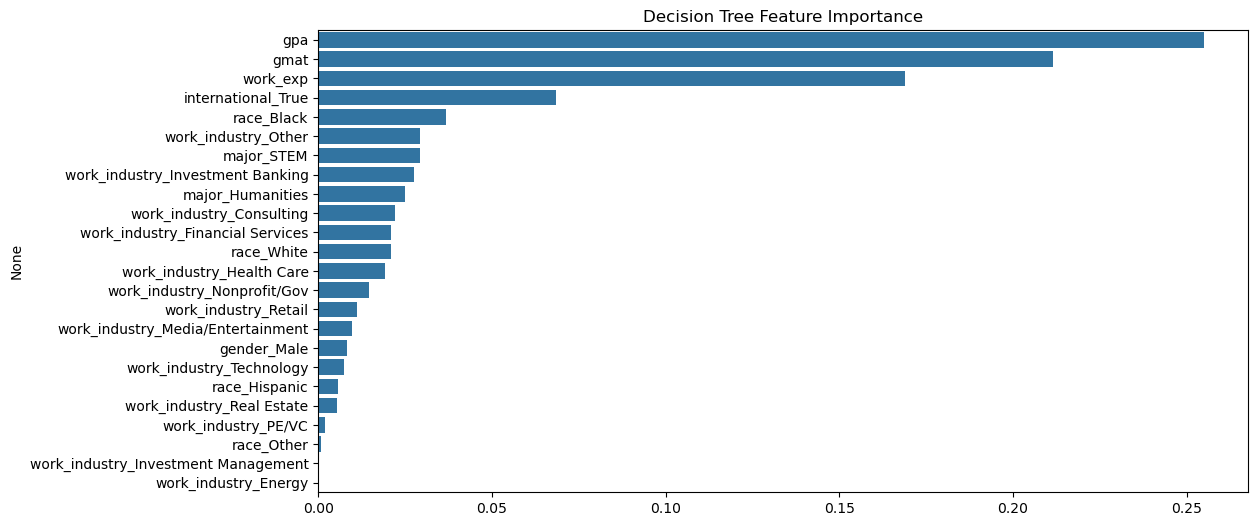

Decision Tree Accuracy: 0.8400


In [39]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

dt_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=dt_importance.values, y=dt_importance.index)
plt.title("Decision Tree Feature Importance")
plt.show()
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

In [54]:
top_features = rf_importance.index[:6]
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [55]:
top_rf = RandomForestClassifier(n_estimators=100, random_state=42)
top_rf.fit(X_train_selected, y_train)
y_pred_top_rf = top_rf.predict(X_test_selected)
top_rf_accuracy = accuracy_score(y_test, y_pred_top_rf)

top_xgb = XGBClassifier(eval_metric='logloss')
top_xgb.fit(X_train_selected, y_train)
y_pred_top_xgb = top_xgb.predict(X_test_selected)
top_xgb_accuracy = accuracy_score(y_test, y_pred_top_xgb)

top_dt = DecisionTreeClassifier(random_state=42)
top_dt.fit(X_train_selected, y_train)
y_pred_top_dt = top_dt.predict(X_test_selected)
top_dt_accuracy = accuracy_score(y_test, y_pred_top_dt)

print(f"Random Forest (Top Features) Accuracy: {top_rf_accuracy:.4f}")
print(f"XGBoost (Top Features) Accuracy: {top_xgb_accuracy:.4f}")
print(f"Decision Tree (Top Features) Accuracy: {top_dt_accuracy:.4f}")

Random Forest (Top Features) Accuracy: 0.8800
XGBoost (Top Features) Accuracy: 0.8500
Decision Tree (Top Features) Accuracy: 0.8150
